In [2]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
df.describe()

,english,mathematics
count,50.000000,50.000000
mean,58.380000,78.880000
std,9.799813,8.414371
min,37.000000,57.000000
25%,54.000000,76.000000
50%,57.500000,80.000000
75%,65.000000,84.000000
max,79.000000,94.000000


In [15]:
# 분산
print("영어 점수의 분산 : ", np.var(df['english']))
print("수학 점수의 분산 : ", np.var(df['mathematics']))

영어 점수의 분산 :  94.11560000000001
수학 점수의 분산 :  69.38559999999995


# 공분산

- 스칼라인 두 확률변수 X, Y가 있을 때, 두 변수 사이에 어떤 상관관계가 있는지 관계성을 수치화한 값
- 0보다 클수록 높은 양의 상관 관계, 0보다 작을수록 높은 음의 상관관계, 0에 가까울수록 상관관계가 없다.
- 계산식
$$
S_{xy}=\frac{1}{n} \sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})
$$

In [16]:
summary_df = df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
# 편차곱 기준으로 내림차순 정렬
result = summary_df.sort_values(by='product of deviations', ascending=False)
result.head(4)

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student number,,,,,
35,37,57,-21.38,-21.88,467.7944
4,41,63,-17.38,-15.88,275.9944
1,42,65,-16.38,-13.88,227.3544
36,79,89,20.62,10.12,208.6744


In [17]:
# 편차곱의 평균, 즉 공분산
summary_df['product of deviations'].mean()

58.4856

In [23]:
# 공분산 행렬 using numpy
np.cov(df['english'], df['mathematics'], ddof=0)
# 공분산만 얻고 싶은 경우
np.cov(df['english'], df['mathematics'], ddof=0)[0, 1]

58.4856

In [26]:
# 공분산 행렬 using pandas
df.cov(ddof=0)
# 공분산만 얻고 싶은 경우
df.cov(ddof=0)['english']['mathematics']
df.cov(ddof=0).loc[['english'], ['mathematics']]
df.cov(ddof=0).iloc[0, 1]
df.cov(ddof=0).iloc[[0], [1]]

,mathematics
english,58.4856


# 상관계수

- 공분산은 두 확률 변수의 단위가 다르면 의미가 퇴색되는 문제가 있다.
- 이 문제를 해결하기 위해 나온 방식이 **상관계수**이다.
- 상관계수는 공분산이 갖는 확률 변수의 단위에 따른 영향을 제거하여 정규화시킨 값이다.
- 공분산을 각 데이터의 표준편차로 나누어준 값이다.
$$
r_{xy}=\frac{S_{xy}}{S_xS_y}=\frac{1}{n}\sum_{i=1}^n\left(\frac{x_i-\bar{x}}{S_x}\right)\left(\frac{y_i-\bar{y}}{S_y}\right)
$$
- 상관계수의 범위는 -1 ~ 1이다.
  - 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계, 0에 가까울수록 상관관계가 없다.
  - 1 또는 -1은 직선이다.


In [31]:
# 상관계수 using numpy
eng_s = df['english']
math_s = df['mathematics']
np.cov(eng_s, math_s, ddof=0)[0, 1] / (np.std(eng_s) * np.std(math_s))
# 동일 데이터에 대한 상관계수는 1
np.corrcoef(eng_s, math_s)

array([[1.        , 0.72374149],
       [0.72374149, 1.        ]])

In [32]:
# 상관계수 using pandas
df.corr()

,english,mathematics
english,1.000000,0.723741
mathematics,0.723741,1.000000


# 시각화

## 산점도

In [36]:
import matplotlib.pyplot as plt

df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
eng_s = df['english']
math_s = df['mathematics']

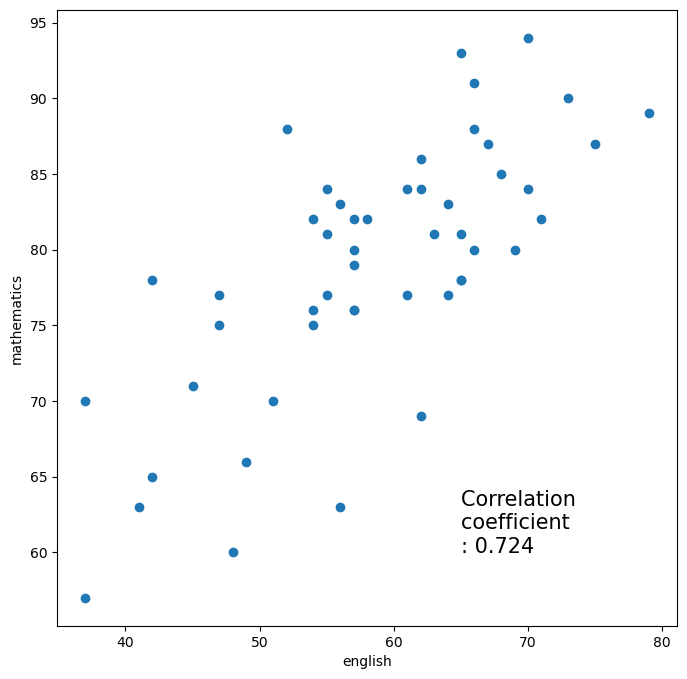

In [41]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# 산점도 - scatter
ax.scatter(eng_s, math_s)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.text(65, 60, f"Correlation \ncoefficient \n: {np.round(np.corrcoef(eng_s, math_s)[0][1], 3)}", fontsize=15)

plt.show()

## 회귀 분석

- 둘 이상의 변수 간의 관계를 보여주는 통계적 방법
- 선형 회귀 분석(linear regression)
  - $y=\beta_0 + \beta_1x$
- 다항 회귀 분석(polynomial regression)
  - $y=\beta_0 + \beta_1x + \beta_2x^2+\cdots+\beta_dx^d$

In [ ]:
df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
eng_s = df['english']
math_s = df['mathematics']

In [49]:
# 계수 β_0과 β_1을 구한다.
poly_fit = np.polyfit(eng_s, math_s, 1)
# β_0 + β_1x를 반환하는 함수 작성
poly_1d = np.poly1d(poly_fit)
type(poly_1d)

numpy.poly1d

[65.59397592 66.12662422 66.65927252 67.19192082 67.72456912 68.25721742
 68.78986572 69.32251401 69.85516231 70.38781061 70.92045891 71.45310721
 71.98575551 72.51840381 73.05105211 73.58370041 74.11634871 74.64899701
 75.18164531 75.71429361 76.24694191 76.77959021 77.31223851 77.8448868
 78.3775351  78.9101834  79.4428317  79.97548    80.5081283  81.0407766
 81.5734249  82.1060732  82.6387215  83.1713698  83.7040181  84.2366664
 84.7693147  85.301963   85.8346113  86.3672596  86.89990789 87.43255619
 87.96520449 88.49785279 89.03050109 89.56314939 90.09579769 90.62844599
 91.16109429 91.69374259]


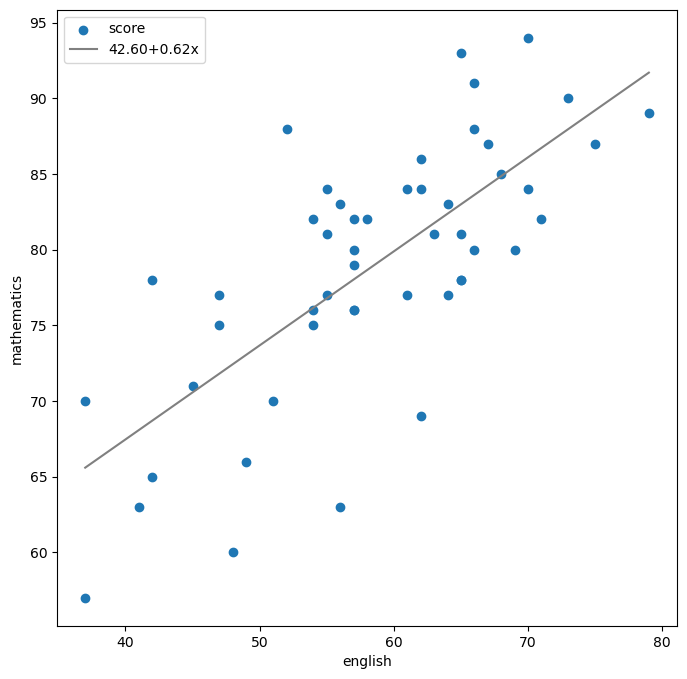

In [50]:
# 직선을 그리기 위해 x좌표 생성
xs = np.linspace(eng_s.min(), eng_s.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(eng_s, math_s, label='score')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례 표시
ax.legend(loc='upper left')

plt.show()

## 히트맵

- 히스토그램의 2차원 버전이다.
- 도수를 색으로 표현한다.
- matplotlib에서 hist2d 함수로 제공한다.

In [51]:
df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
eng_s = df['english']
math_s = df['mathematics']

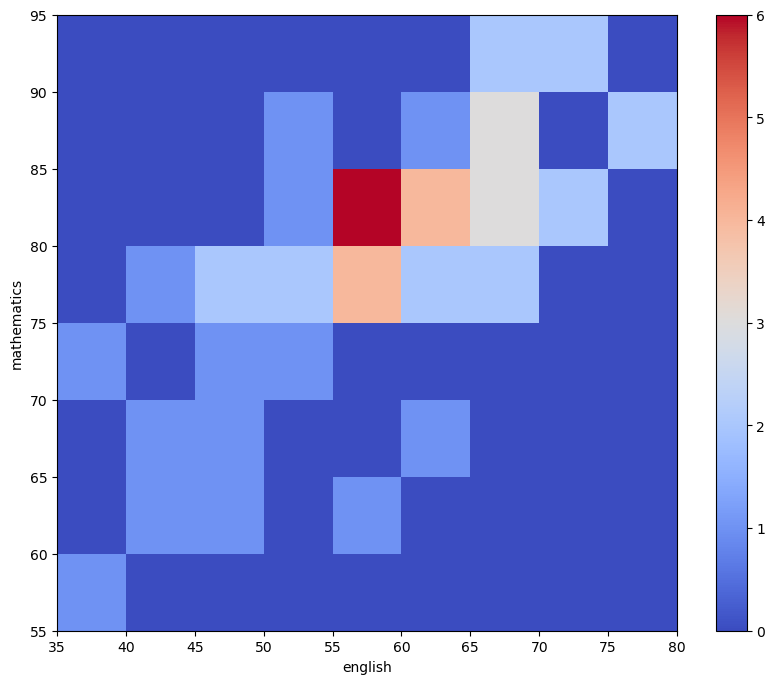

[35. 40. 45. 50. 55. 60. 65. 70. 75. 80.]
[55. 60. 65. 70. 75. 80. 85. 90. 95.]


In [56]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(eng_s, math_s, bins=[9, 8], range=[(35, 80), (55, 95)], cmap='coolwarm')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

## 앤스컴 콰르텟

- 1973년 통계학자 프란시스 앤스컴이 시각화의 중요성을 보여주기 위해 만들었다.
- 동일해 보이는 지표를 가진 데이터라도 그림으로 나타내면 종종 전혀 다른 데이터가 되곤 한다.
- 따라서 데이터 분석을 할 때는 수치에만 의존하지 맘ㄹ고, 가능하면 데이터를 시각화하여 보아야 한다.

In [66]:
anscombe_data = np.load('ch3_anscombe.npy')
print(anscombe_data.shape)
print(anscombe_data[0])

(4, 11, 2)
[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]
[[10.    9.14]
 [ 8.    8.14]
 [13.    8.74]
 [ 9.    8.77]
 [11.    9.26]
 [14.    8.1 ]
 [ 6.    6.13]
 [ 4.    3.1 ]
 [12.    9.13]
 [ 7.    7.26]
 [ 5.    4.74]]


In [64]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean', 'Y_variance', 'X&Y_correlation', 'X&Y_regression line'])

for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


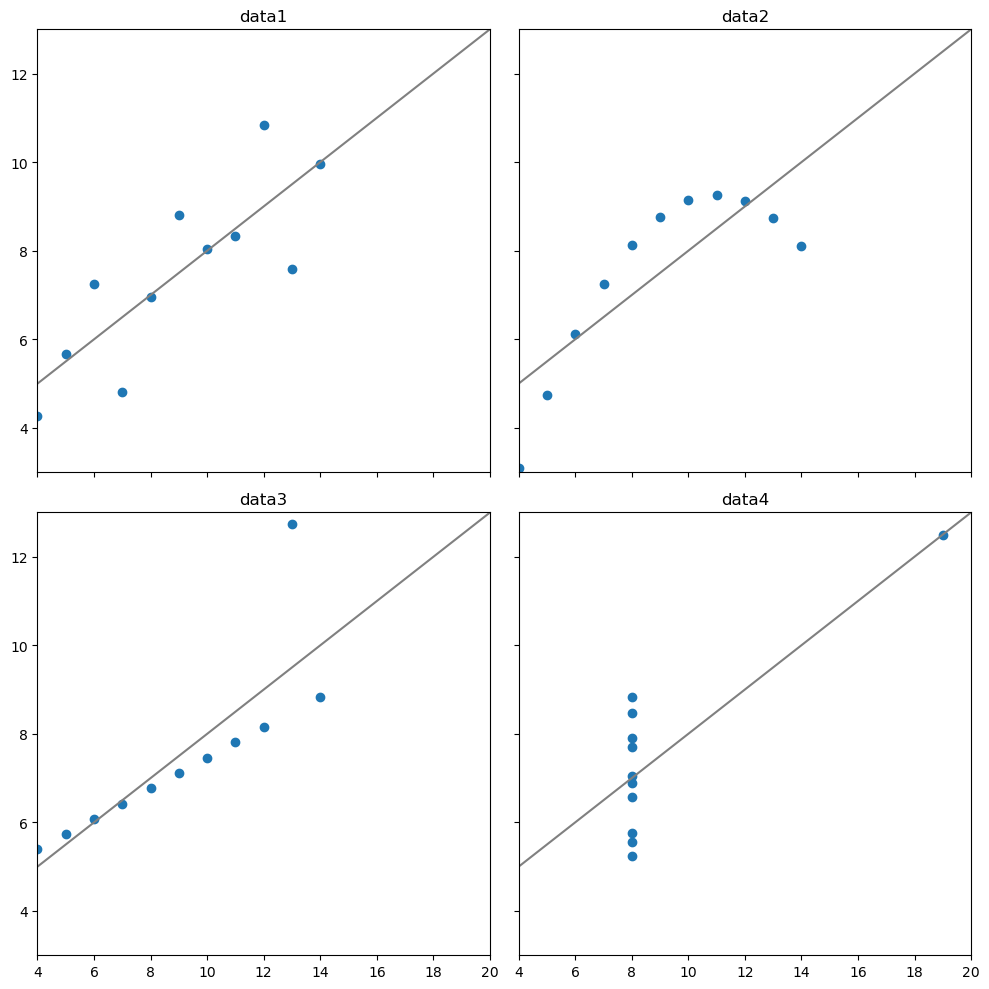

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:, 0], data[:, 1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)

    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])

    ax.set_title(f'data{i+1}')
    ax.scatter(data[:, 0], data[:, 1])
    ax.plot(xs, ys, color='gray')

plt.tight_layout()
plt.show()